<a href="https://colab.research.google.com/github/RiteshopShrivastava/Neural_Network/blob/main/Assignment_NN_Gas_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
turbine_df = pd.read_csv('/content/gas_turbines.csv')

In [ ]:
turbine_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
turbine_df.info()

In [ ]:
turbine_df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
turbine_df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

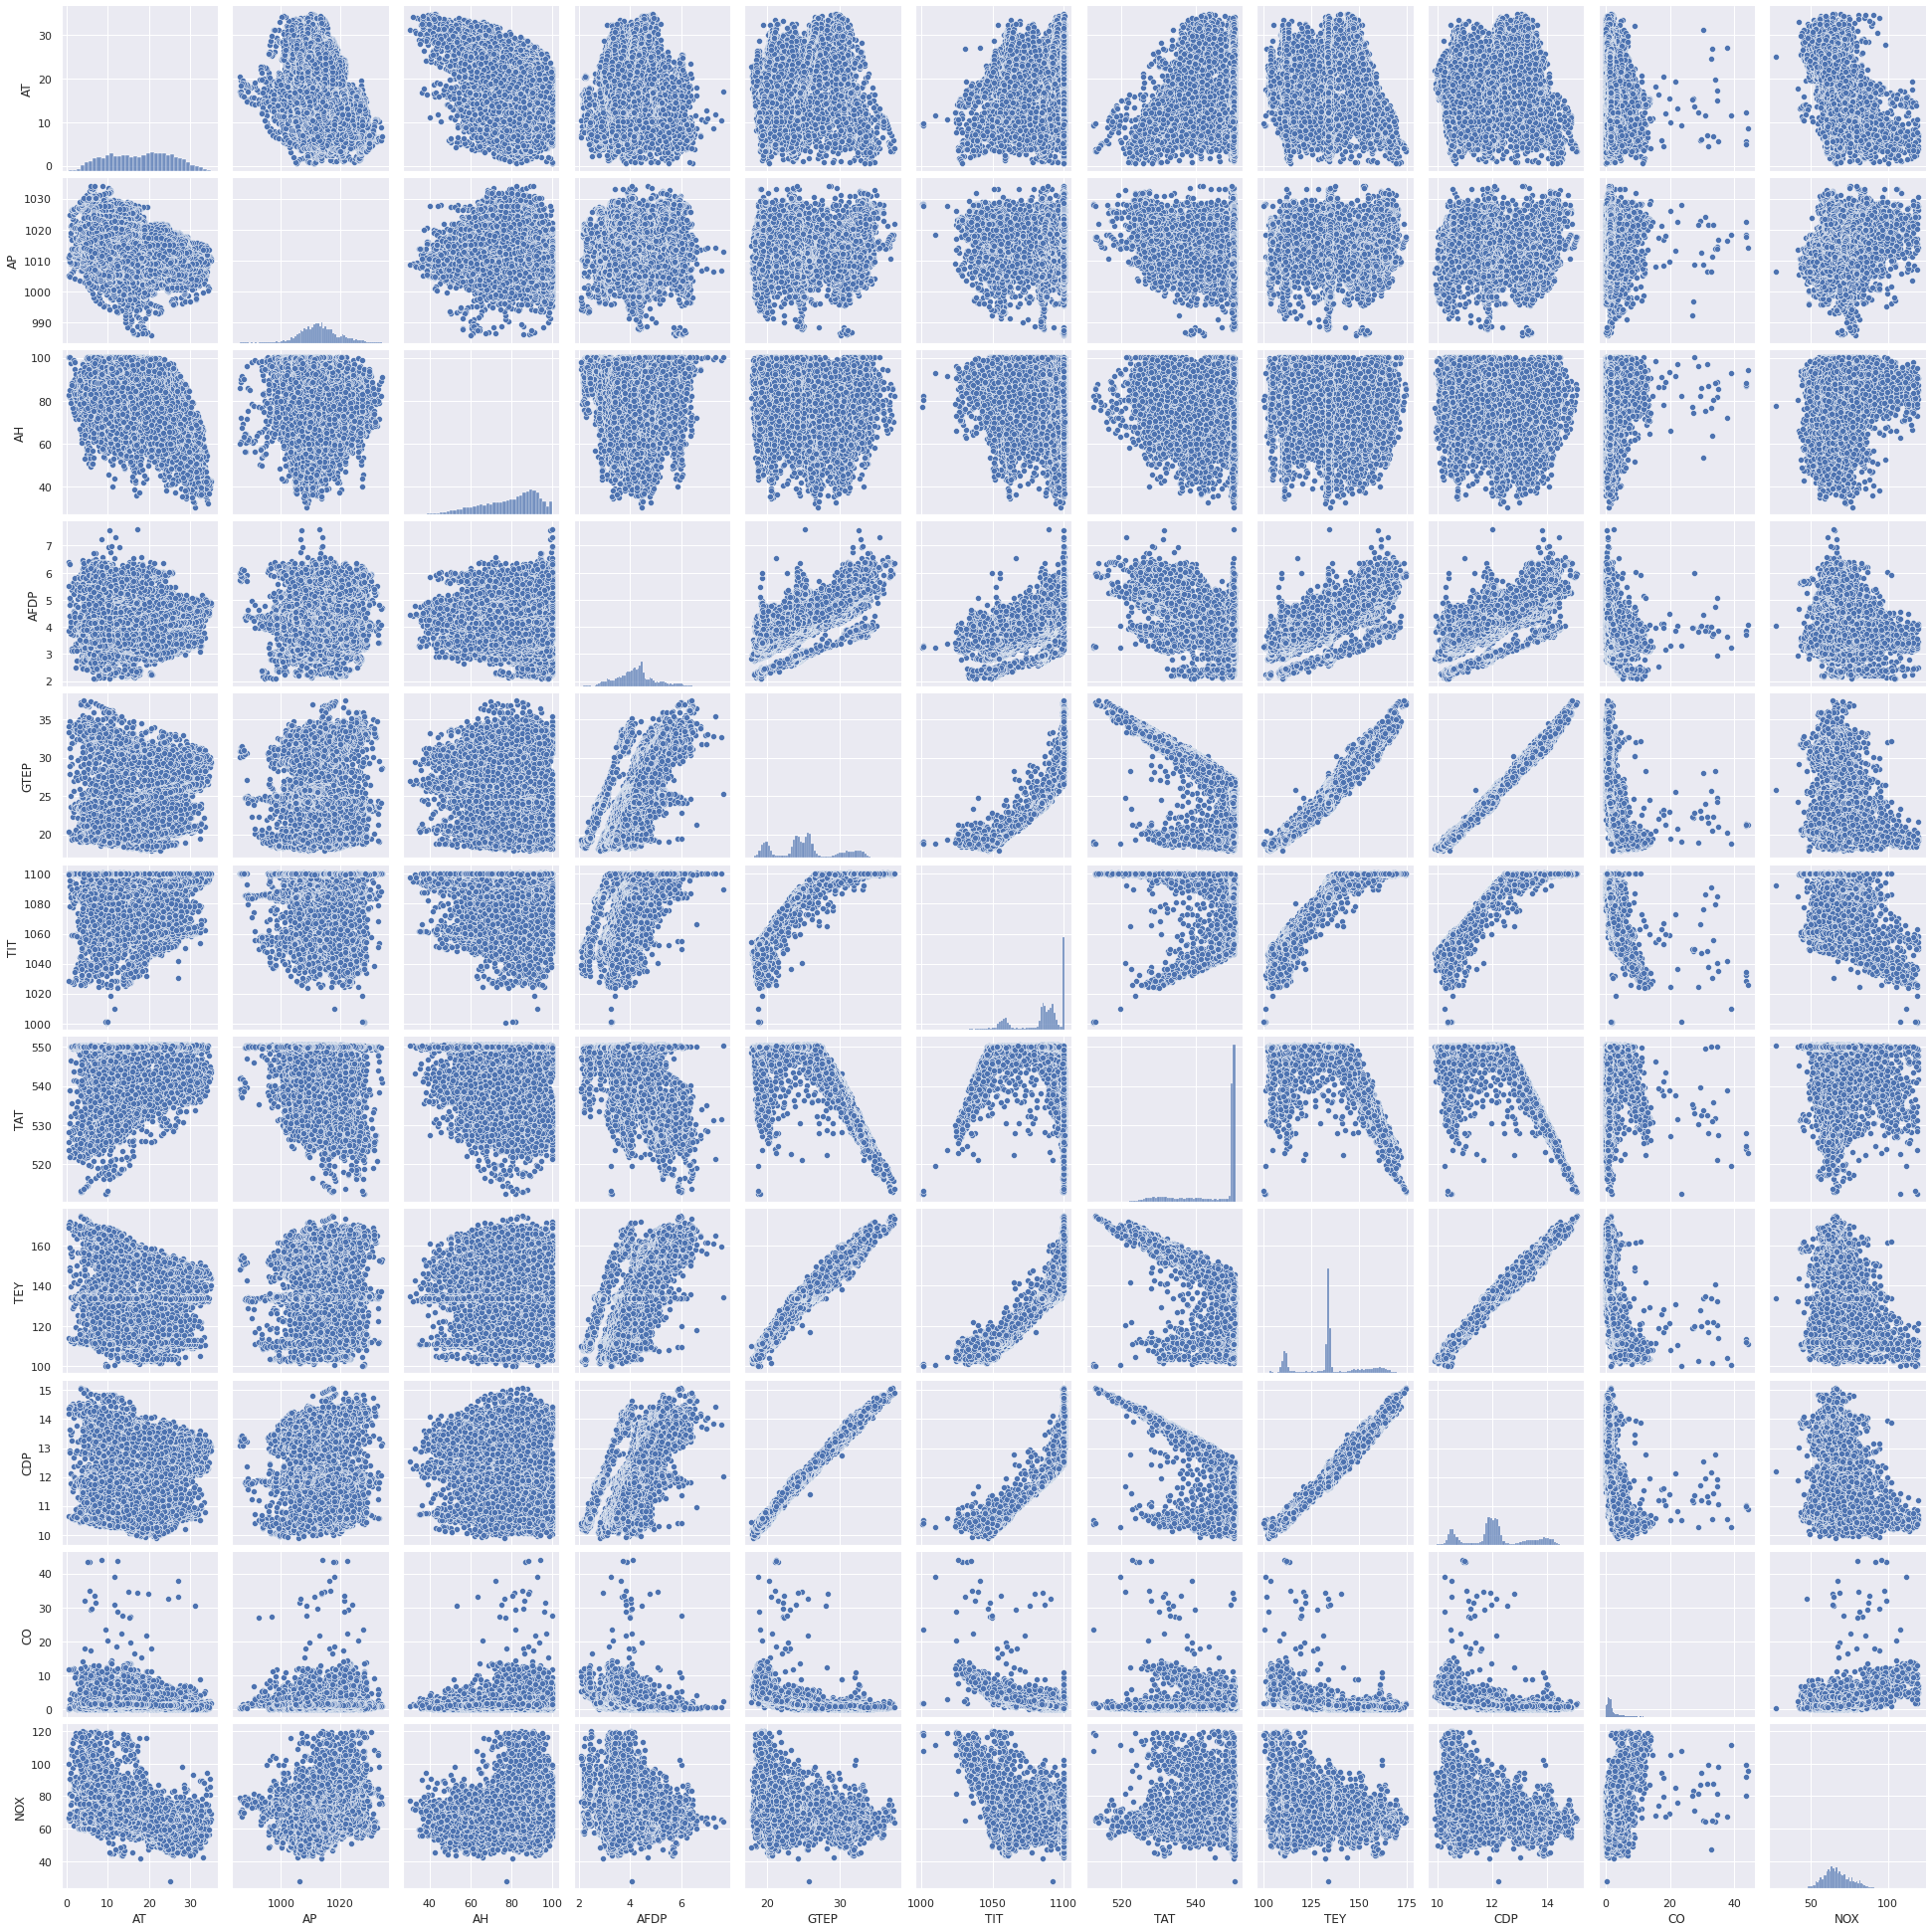

In [ ]:
sns.pairplot(turbine_df, palette='bright')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


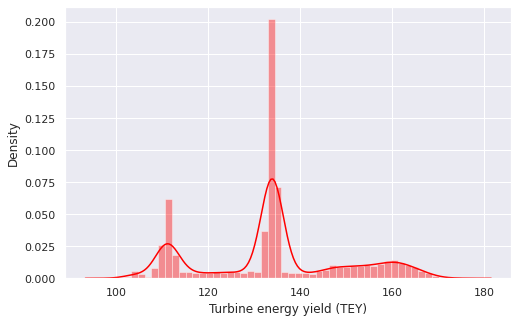

In [ ]:
#sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(x=turbine_df['TEY'], color='red', axlabel='Turbine energy yield (TEY)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


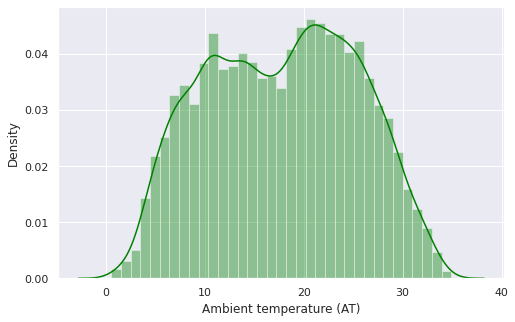

In [ ]:
sns.distplot(x=turbine_df['AT'],color='green', axlabel='Ambient temperature (AT)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


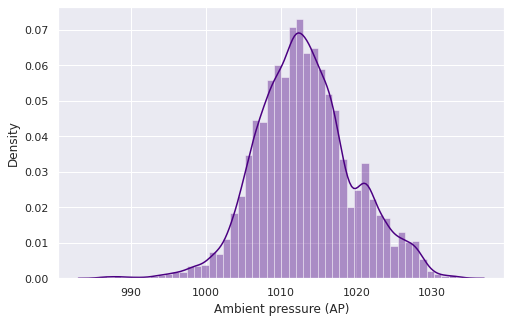

In [ ]:
sns.distplot(x=turbine_df['AP'],color='indigo', axlabel='Ambient pressure (AP)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


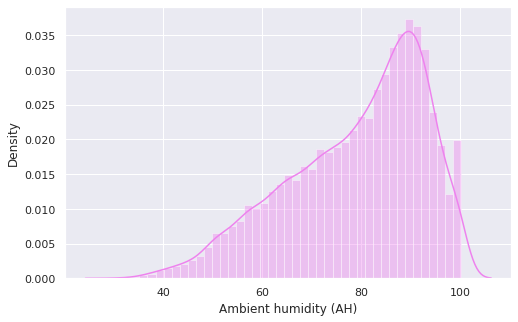

In [ ]:
sns.distplot(x=turbine_df['AH'],color='violet', axlabel='Ambient humidity (AH)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


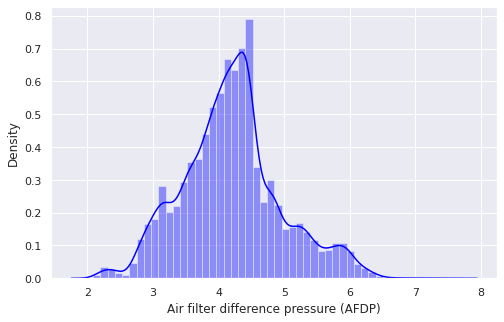

In [ ]:
sns.distplot(x=turbine_df['AFDP'],color='blue', axlabel='Air filter difference pressure (AFDP)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


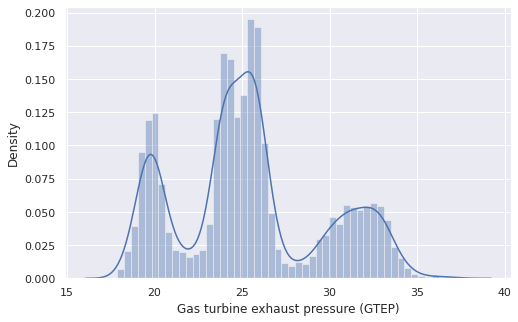

In [ ]:
sns.distplot(x=turbine_df['GTEP'], axlabel='Gas turbine exhaust pressure (GTEP)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


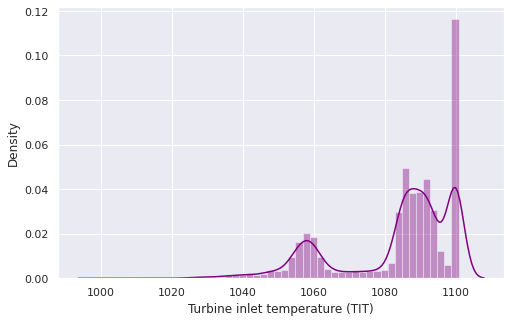

In [ ]:
sns.distplot(x=turbine_df['TIT'],color='purple', axlabel='Turbine inlet temperature (TIT)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


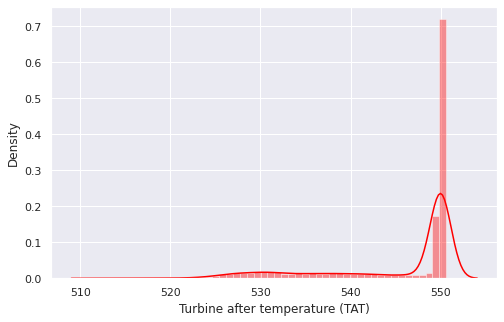

In [ ]:
sns.distplot(x=turbine_df['TAT'],color='red', axlabel='Turbine after temperature (TAT)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


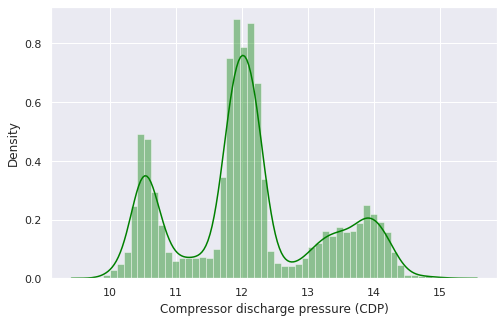

In [ ]:
sns.distplot(x=turbine_df['CDP'],color='green', axlabel='Compressor discharge pressure (CDP)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


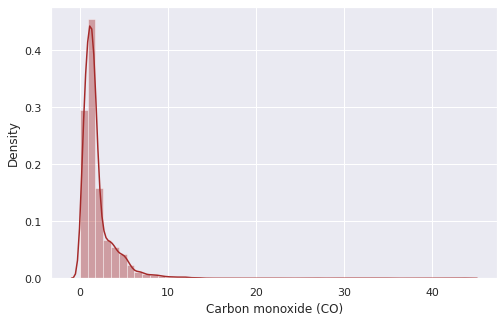

In [ ]:
sns.distplot(x=turbine_df['CO'],color='brown', axlabel='Carbon monoxide (CO)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


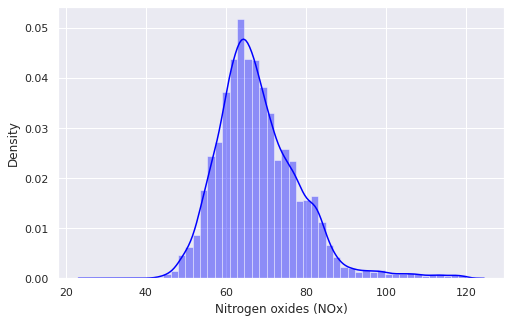

In [ ]:
sns.distplot(x=turbine_df['NOX'],color='blue', axlabel='Nitrogen oxides (NOx)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, KFold

In [ ]:
x= pd.concat([turbine_df.iloc[:,0:7], turbine_df.iloc[:,8:]], axis=1)
y= pd.DataFrame(turbine_df['TEY'])

In [ ]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [ ]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [ ]:
x_train,x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=50)

In [ ]:
x_train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
11722,30.3280,1010.3,55.467,3.9555,26.213,1094.3,549.87,12.294,0.26836,61.489
3402,19.8480,1013.5,87.611,3.3147,19.671,1056.3,550.27,10.428,5.52000,58.574
795,8.5377,1016.9,70.545,6.4033,36.623,1100.1,517.72,14.745,1.71730,74.747
13722,18.9330,1014.6,74.488,4.8506,31.022,1100.0,533.47,13.751,0.74495,60.201
12904,20.9930,1010.6,70.581,3.1876,20.190,1059.8,549.98,10.566,2.73190,62.738
...,...,...,...,...,...,...,...,...,...,...
10206,13.3260,1016.7,84.091,2.9103,19.075,1054.6,548.51,10.536,4.78040,90.497
6253,19.9660,1006.6,74.547,4.2187,25.036,1088.9,550.00,12.079,1.83490,67.854
10123,15.8680,1006.0,96.173,3.6306,24.344,1086.3,549.85,11.960,0.63680,67.369
5600,21.1200,1017.1,92.342,4.4535,25.234,1089.9,549.97,12.086,1.69150,61.438


In [ ]:
y_train

,TEY
11722,133.84
3402,110.11
795,168.43
13722,155.44
12904,111.38
...,...
10206,111.68
6253,133.96
10123,133.85
5600,133.24


In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler= MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[0.86693116, 0.50249792, 0.34443695, ..., 0.46394595, 0.00607611,
        0.36646563],
       [0.56210897, 0.56910908, 0.81550794, ..., 0.10165806, 0.12515387,
        0.33478946],
       [0.23313661, 0.63988343, 0.56540536, ..., 0.93981284, 0.03892995,
        0.51053518],
       ...,
       [0.44634635, 0.41298918, 0.94098423, ..., 0.39909913, 0.01443027,
        0.43036131],
       [0.59910648, 0.64404663, 0.88484085, ..., 0.4235623 , 0.03834495,
        0.36591144],
       [0.35780831, 0.89175687, 0.6014274 , ..., 0.42705704, 0.02912781,
        0.5396251 ]])

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
def regression_model():
  model = Sequential()
  model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  
  adam= Adam(learning_rate=.001)
  model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
  return model

In [ ]:
model = KerasRegressor(build_fn=regression_model, verbose=0)
batch_size= [10,50,100]
epochs = [40,70,100]
param_grid = dict(batch_size=batch_size, epochs= epochs)
gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
grid_result= gsv.fit(x_train_scaled, y_train)

In [ ]:
print(grid_result.best_score_, grid_result.best_params_)

-17972.195703125 {'batch_size': 50, 'epochs': 40}


In [ ]:
def regression_model(learning_rate, dropout_rate):
  model = Sequential()
  model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam= Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
  return model

model = KerasRegressor(build_fn=regression_model,batch_size=50, epochs=40, verbose=0)
learning_rate= [0.1,0.01,0.001]
dropout_rate= [0.0,0.1,0.2]
param_grid = dict(learning_rate=learning_rate, dropout_rate=dropout_rate)
gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
grid_result1= gsv.fit(x_train_scaled, y_train)


In [ ]:
print(grid_result1.best_score_, grid_result1.best_params_)

-17972.195703125 {'dropout_rate': 0.0, 'learning_rate': 0.1}


In [ ]:
def regression_model(activation_function, init):
  model = Sequential()
  model.add(Dense(12, input_dim=10,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.0))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.0))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam= Adam(learning_rate=0.1)
  model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
  return model

model = KerasRegressor(build_fn=regression_model,batch_size=50, epochs=40, verbose=0)
activation_function= ['relu', 'tanh','softmax','linear']
init = ['zero', 'uniform','normal']
param_grid = dict(activation_function=activation_function, init=init)
gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
grid_result2= gsv.fit(x_train_scaled, y_train)


In [ ]:
print(grid_result2.best_score_, grid_result2.best_params_)

-17972.195703125 {'activation_function': 'relu', 'init': 'zero'}


In [ ]:
def regression_model(neuron1,neuron2):
  model = Sequential()
  model.add(Dense(12, input_dim=10,kernel_initializer='zero',activation='relu'))
  model.add(Dropout(0.0))
  model.add(Dense(8,kernel_initializer='zero',activation='relu'))
  model.add(Dropout(0.0))
  model.add(Dense(1,kernel_initializer='zero',activation='sigmoid'))
  adam= Adam(learning_rate=0.1)
  model.compile(loss='mean_squared_error',optimizer=adam, metrics=['mae','mse'])
  return model

model = KerasRegressor(build_fn=regression_model,batch_size=50, epochs=40, verbose=0)
neuron1= [16,12,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1=neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=5)
grid_result3= gsv.fit(x_train_scaled, y_train)

In [ ]:
print(grid_result3.best_score_, grid_result3.best_params_)

-17972.196484375 {'neuron1': 16, 'neuron2': 12}


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=10,kernel_initializer='zero',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(12,input_dim=10,kernel_initializer='zero',activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(1,kernel_initializer='zero')) 
optimizer= RMSprop(learning_rate=0.1)
model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse'])

In [ ]:
model.fit(x_train_scaled, y_train, batch_size=50, epochs=40)
y_predict = model.predict(x_test_scaled)

In [ ]:
model.summary()

Model: "sequential_450"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1354 (Dense)           (None, 16)                176       
_________________________________________________________________
dropout_904 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_1355 (Dense)           (None, 12)                204       
_________________________________________________________________
dropout_905 (Dropout)        (None, 12)                0         
_________________________________________________________________
dense_1356 (Dense)           (None, 1)                 13        
Total params: 393
Trainable params: 393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('predicted values are :', y_predict[:5])
print('Real values are:', y_test[:5])

#print('Accuracy :',accuracy_score(y, y_predict))

predicted values are : [[134.46098]
 [134.46098]
 [134.46098]
 [134.46098]
 [134.46098]]
Real values are:          TEY
428   134.54
9961  158.56
5749  134.25
5675  134.48
9426  153.67


In [ ]:
score= model.evaluate(x_test_scaled, y_test)

141/141 [==============================] - 0s 1ms/step - loss: 247.8234 - mae: 11.1262 - mse: 247.8234


In [ ]:
mae = mean_absolute_error(y_test, y_predict)
print('Mean absolute error :',mae)

Mean absolute error : 11.126216276182351


In [ ]:
mse = mean_squared_error(y_test, y_predict)
print('Mean squared error :',mse)

Mean squared error : 247.8234747766685


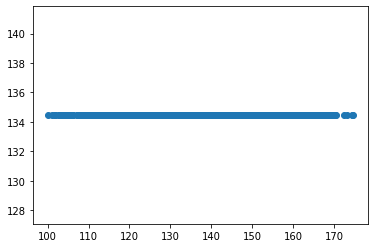

In [ ]:
plt.scatter( y_test,y_predict)